In [1]:
coordinates = [149.829, 151.494, -34.391, -32.897]

# For simplicity, store the centre X and Y coords
centre_x = (coordinates[0] + coordinates[1]) / 2
centre_y = (coordinates[2] + coordinates[3]) / 2

# And now make a bounding box with them
# Note that you can change the box_size to load more data. More data means longer load, though!
box_size = 0.2
bounding_box_x =  (centre_x - box_size, centre_x + box_size)
bounding_box_y =  (centre_y - box_size, centre_y + box_size)

In [6]:
%%time
import datacube

dc = datacube.Datacube(app='do-it-yourself')

# This command here does the loading of data
# Please be patient, it can take some time to load, depending on the size of your study area
# For the example study area, this took 30 seconds
dataset = dc.load(
    product='esl', 
    x=bounding_box_x,
    y=bounding_box_y
)

CPU times: user 230 ms, sys: 120 ms, total: 350 ms
Wall time: 2.46 s


In [7]:
# This will give information on how much data was loaded
# Most interesting is the 'Dimensions' section, that tells you how many timesteps were loaded
# and the x/y resolution of the cube.
dataset

<xarray.Dataset>
Dimensions:  (time: 1, x: 1931, y: 2280)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01
  * y        (y) float64 4.473e+06 4.473e+06 4.473e+06 ... 4.428e+06 4.428e+06
  * x        (x) float64 9.62e+06 9.62e+06 9.62e+06 ... 9.659e+06 9.659e+06
Data variables:
    band1    (time, y, x) int16 0 0 0 0 0 0 0 0 0 0 0 ... 2 2 2 2 2 2 2 2 2 2 2
Attributes:
    crs:      EPSG:3308

<IPython.core.display.Javascript object>


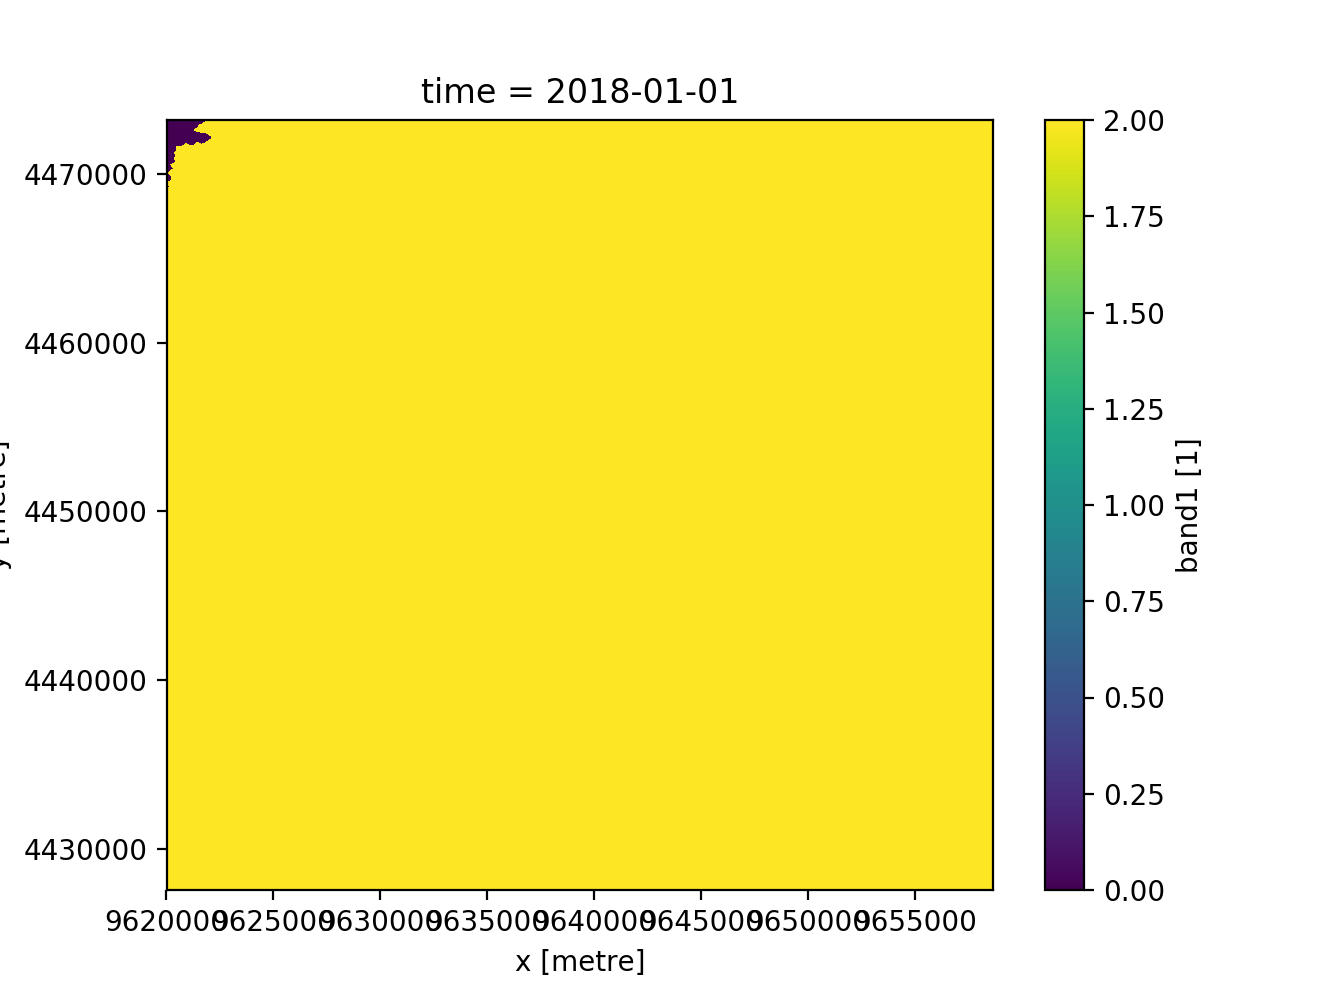

In [8]:
%matplotlib notebook
dataset.band1.isel(time=0).plot(size=5)

<IPython.core.display.Javascript object>


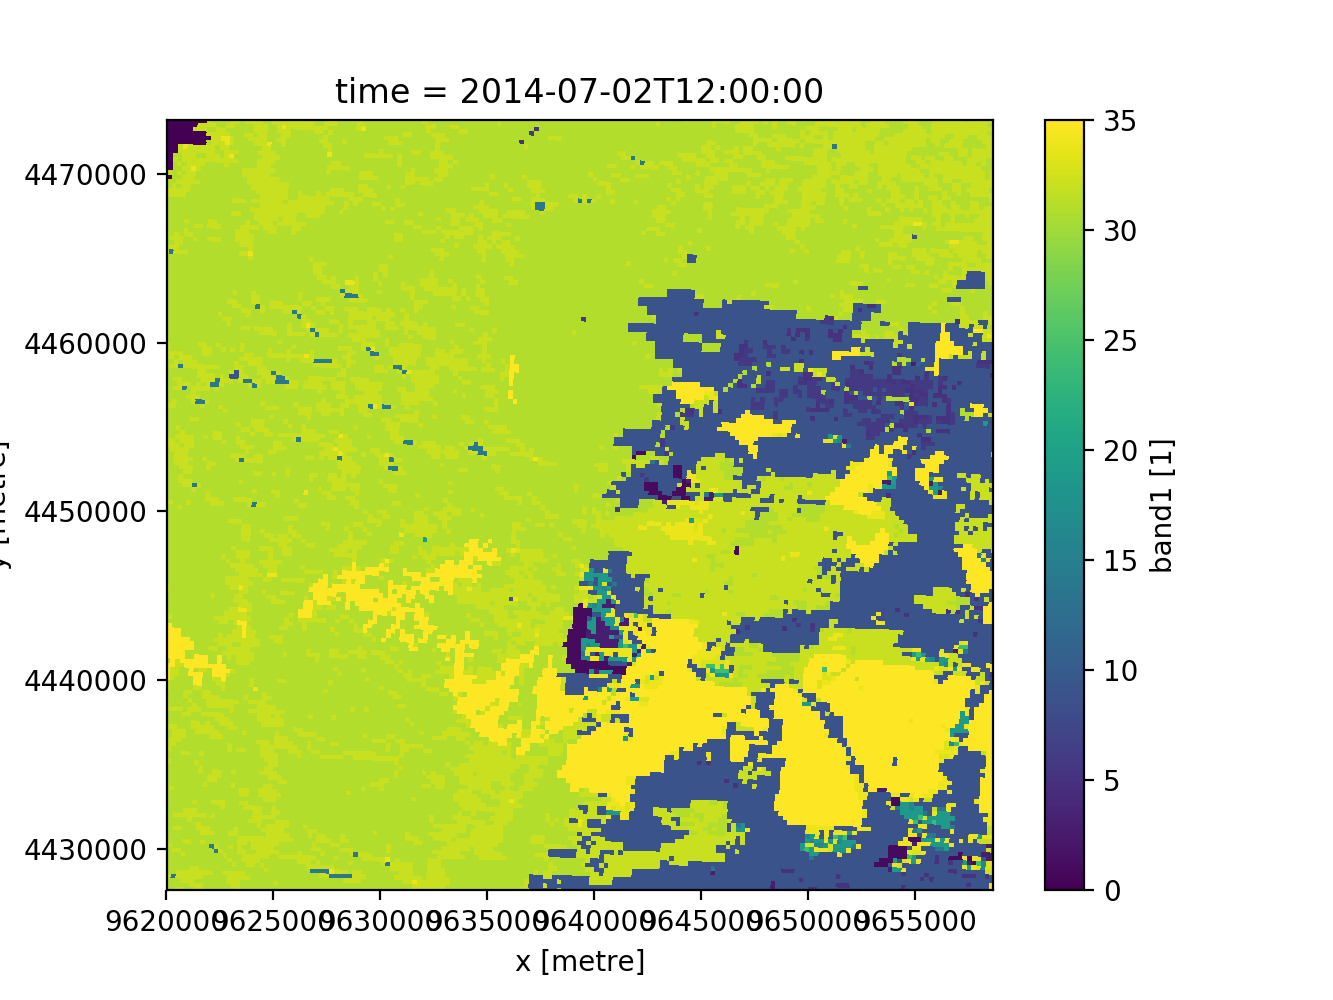

In [6]:
%matplotlib notebook
dataset.band1.isel(time=-1).plot(size=5)